<a href="https://colab.research.google.com/github/Brentkong/Code-for-NeuralIPs/blob/main/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Use: https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Imports**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [ ]:
x_train = np.load('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Data/Processed Data/42850/x_train.npy')
x_val = np.load('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Data/Processed Data/42850/x_val.npy')
x_test = np.load('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Data/Processed Data/42850/x_test.npy')

y_train = np.load('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Data/Processed Data/42850/y_train.npy')
y_val = np.load('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Data/Processed Data/42850/y_val.npy')
y_test = np.load('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Data/Processed Data/42850/y_test.npy')

In [ ]:
Test, Precision, Recall, F1, ROC_AUC = [], [], [], [], []

In [ ]:
y_test = np.array([np.argmax(i) for i in y_test])

### **VGG (Visual Geometry Group) Networks:**

In [ ]:
#https://www.kaggle.com/code/blurredmachine/vggnet-16-architecture-a-complete-guide

In [ ]:
def vgg():
    model=Sequential()
    model.add(Conv2D(64,(3,3), strides = 1, padding='same', input_shape=(32,32,3), activation='relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(64,(3,3), strides = 1, padding='same', activation='relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides = 2, padding='same'))
    model.add(Conv2D(128,(3,3), strides = 1, padding='same', activation='relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(128,(3,3), strides = 1, padding='same', activation='relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides = 2, padding='same'))
    model.add(Conv2D(256,(3,3), strides = 1, padding='same', activation='relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(256,(3,3), strides = 1, padding='same', activation='relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides = 2, padding='same'))
    model.add(Conv2D(512,(3,3), strides = 1, padding='same', activation='relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(512,(3,3), strides = 1, padding='same', activation='relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(512,(3,3), strides = 1, padding='same', activation='relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides = 2, padding='same'))
    model.add(Conv2D(512,(3,3), strides = 1, padding='same', activation='relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(512,(3,3), strides = 1, padding='same', activation='relu', kernel_initializer= 'he_normal'))
    model.add(Conv2D(512,(3,3), strides = 1, padding='same', activation='relu', kernel_initializer= 'he_normal'))
    model.add(MaxPooling2D(pool_size=(3,3), strides = 2, padding='same'))
    model.add(Flatten())
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(4096, activation="relu"))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model
vgg_net = vgg()

In [ ]:
early_stopping = callbacks.EarlyStopping(monitor='accuracy', patience=20,  min_delta=0.1)
vgg_net.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=64, verbose=2, callbacks = [early_stopping])

Epoch 1/100
469/469 - 22s - loss: 0.4367 - accuracy: 0.8665 - val_loss: 0.3354 - val_accuracy: 0.8768 - 22s/epoch - 47ms/step
Epoch 2/100
469/469 - 11s - loss: 0.2013 - accuracy: 0.9243 - val_loss: 0.1826 - val_accuracy: 0.9295 - 11s/epoch - 24ms/step
Epoch 3/100
469/469 - 11s - loss: 0.1739 - accuracy: 0.9354 - val_loss: 0.1750 - val_accuracy: 0.9302 - 11s/epoch - 24ms/step
Epoch 4/100
469/469 - 11s - loss: 0.1693 - accuracy: 0.9360 - val_loss: 0.2578 - val_accuracy: 0.9083 - 11s/epoch - 24ms/step
Epoch 5/100
469/469 - 11s - loss: 0.2670 - accuracy: 0.8878 - val_loss: 0.2215 - val_accuracy: 0.9214 - 11s/epoch - 24ms/step
Epoch 6/100
469/469 - 11s - loss: 0.1941 - accuracy: 0.9276 - val_loss: 0.1575 - val_accuracy: 0.9442 - 11s/epoch - 23ms/step
Epoch 7/100
469/469 - 11s - loss: 0.1507 - accuracy: 0.9438 - val_loss: 0.1345 - val_accuracy: 0.9480 - 11s/epoch - 23ms/step
Epoch 8/100
469/469 - 11s - loss: 0.1485 - accuracy: 0.9452 - val_loss: 0.1684 - val_accuracy: 0.9316 - 11s/epoch - 23

In [ ]:
history = pd.DataFrame(vgg_net.history.history)
history.to_csv('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Models/Quebec Models/Training Results/Train_VGG.csv', index = False)

Maximum validation accuracy: 0.9528588056564331


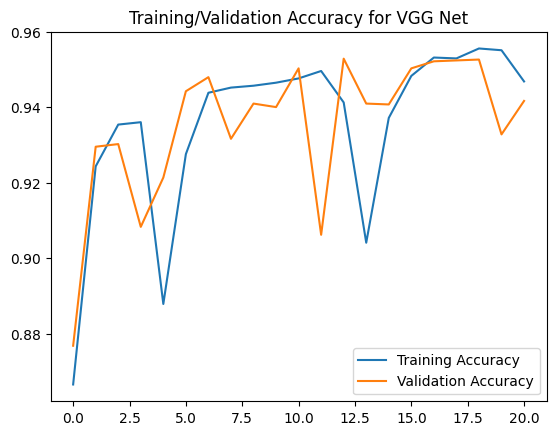

In [ ]:
history = pd.DataFrame(vgg_net.history.history)
print("Maximum validation accuracy: {}".format(history['val_accuracy'].max()))
plt.title('Training/Validation Accuracy for VGG Net')
plt.plot(history['accuracy'], label = 'Training Accuracy')
plt.plot(history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
y_hat_vgg = np.array([np.argmax(i) for i in vgg_net.predict(x_test)])

268/268 [==============================] - 2s 5ms/step


Testing Accuracy
Accuracy: 0.9421236872812135
Precision: 0.9737704918032787
Recall: 0.9154557463672391
F1 Score: 0.9437131184748071
ROC-AUC Score: 0.9438251919522394


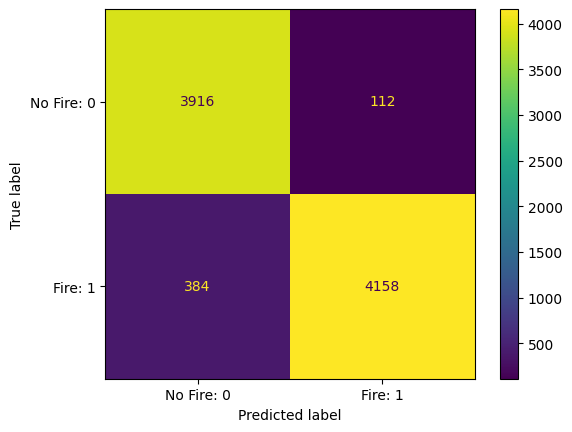

In [ ]:
print("Testing Accuracy")
print("Accuracy: {}".format(accuracy_score(y_true = y_test, y_pred = y_hat_vgg)))
print("Precision: {}".format(precision_score(y_true = y_test, y_pred = y_hat_vgg))) #True positive predictions/Total positive predictions
print("Recall: {}".format(recall_score(y_true = y_test, y_pred = y_hat_vgg)))#True positive predictions/Total number of positive instances
print("F1 Score: {}".format(f1_score(y_true = y_test, y_pred = y_hat_vgg)) )#Harmonic mean of precision and recall
print("ROC-AUC Score: {}".format(roc_auc_score(y_true = y_test, y_score = y_hat_vgg)))


confusion_matrix = metrics.confusion_matrix(y_true = y_test, y_pred = y_hat_vgg)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels= ["No Fire: 0", "Fire: 1"] )
cm_display.plot()
plt.show()

In [ ]:
Test.append(accuracy_score(y_true = y_test, y_pred = y_hat_vgg))
Precision.append(precision_score(y_true = y_test, y_pred = y_hat_vgg))
Recall.append(recall_score(y_true = y_test, y_pred = y_hat_vgg))
F1.append(f1_score(y_true = y_test, y_pred = y_hat_vgg))
ROC_AUC.append(roc_auc_score(y_true = y_test, y_score = y_hat_vgg))

### **Results**

In [ ]:
data_table = pd.DataFrame({'Models': ['VGG-Net'], 'Accuracy':Test, 'Precision': Precision, 'Recall': Recall, 'F1_Score': F1, 'ROC-AUC':ROC_AUC})
data_table.sort_values('Accuracy', inplace=True, ascending = False)
data_table.reset_index(drop = True)

,Models,Accuracy,Precision,Recall,F1_Score,ROC-AUC
0,VGG-Net,0.942124,0.97377,0.915456,0.943713,0.943825


In [ ]:
data_table.to_csv('/content/drive/MyDrive/Research Programs and Folders/NeuralIPS Code/Models/Quebec Models/Separated Results/Results_VGG.csv', index = False)